# Exam score prediction


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [53]:
df=pd.read_csv('Exam_Score_Prediction.csv')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


# Models to adjust
## Linear regression
## KNN 

In [55]:
df_num=df[df.columns[df.dtypes!='object']].copy()
#remove student_id
df_num.drop('student_id',axis=1,inplace=True)

# Linear Relationship between numeric variables

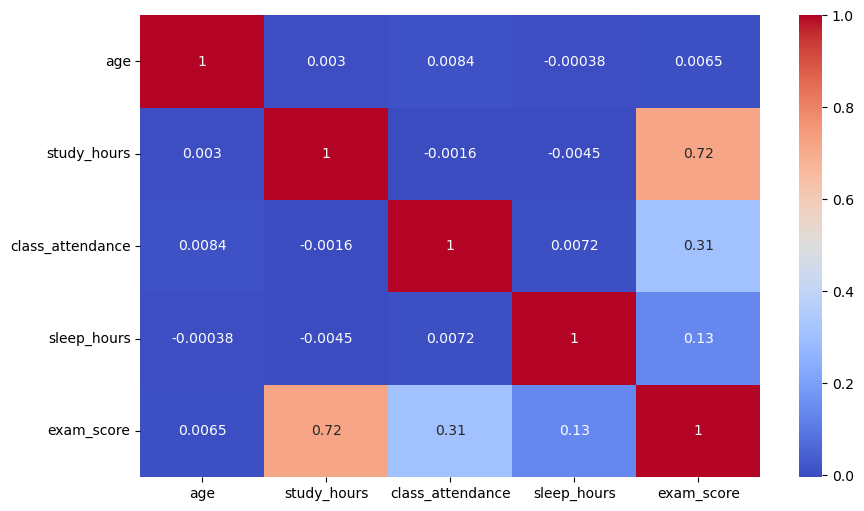

In [56]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm")
plt.show()

# study_hours and class_attendance are more correlated to exam_score than others variable.


# remove  age from the features

In [57]:
df_r=df.drop(['age'],axis=1)

# Split data into target, train set and test set

In [58]:
y=df['exam_score']
x=df.drop(['age','student_id','exam_score'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

# Encoding non numerical variables:
 ***Without rank (dummies)***:gender,course,study_method   
 ***rank***:internet_access,sleep_quality,facility_rating,exam_difficulty


In [59]:
def prep_features(x):
    '''
    x: The dataframe containing your features
    '''
    # encode the categorical column
    df = pd.get_dummies(x, columns= ['gender', 'course','study_method'], dtype=float)
   
    #columns to rank
    #cols = ['internet_access','sleep_quality','facility_rating','exam_difficulty']
   
    #encode the ordinal data
    order = {
        "internet_access": ['no','yes'],
        "sleep_quality": ['poor','average','good'],
        "facility_rating":['low', 'medium','high'],
        "exam_difficulty":['easy','moderate','hard']
    }
   
    #creating encoderinstance
    lae = sk.preprocessing.LabelEncoder()
   
    #apply it to the columns
    for col, orde in order.items(): #.items allows it access the key and values
        lae.fit(orde)
        df[col + '_label'] = lae.transform(df[col])
       
    df.drop(columns=['internet_access','sleep_quality',
                    'facility_rating','exam_difficulty'], inplace=True)
    return df

In [60]:
order=dict({'internet_access':['no','yes'],'sleep_quality':['poor','average','good'],'exam_difficulty':['easy','moderate','hard'],
           'facility_rating':['low','medium','high']})

In [61]:
x_test=prep_features(x_test)

x_train=prep_features(x_train)

In [62]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [63]:
predict=model.predict(x_train)


In [64]:
from skimage.metrics import mean_squared_error
mse=mean_squared_error(y_train,predict)

In [65]:
np.sqrt(mse)

np.float64(10.640613860345319)

In [66]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x_train,y_train,cv=10,scoring='neg_mean_squared_error')

In [67]:
np.sqrt(-scores).mean()

np.float64(10.656235559236533)

# KNN regressor

In [68]:
model2=sk.neighbors.KNeighborsRegressor(n_neighbors=5)
model2.fit(x_train,y_train)

KNeighborsRegressor()

In [69]:
predict2=model2.predict(x_train)
error=mean_squared_error(y_train,predict2)
np.sqrt(error)

np.float64(9.626356718212763)

In [70]:
score2=cross_val_score(model2,x_train,y_train,cv=10,scoring='neg_mean_squared_error')

In [71]:
np.sqrt(-score2).mean()

np.float64(11.79727761165803)

# Test phase

In [72]:
y_predict1=model.predict(x_test)
np.sqrt(mean_squared_error(y_predict1,y_test))

np.float64(10.880992937150388)

In [73]:
y_predict2=model2.predict(x_test)
np.sqrt(mean_squared_error(y_predict2,y_test))

np.float64(11.914188347906878)